<a href="https://colab.research.google.com/github/Gus-22/Gus-22/blob/main/7_funcoes_duas_var.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<u><center>Funções reais de duas variáveis</center></u>**
<br>

Uma função real de duas variáveis $f:\mathbb R^2 \rightarrow \mathbb R$ associa a cada elemento $(x,y)$
do domínio $D \in \mathbb R^2$ a um único elemento de $z \in \mathbb R$.

<br>

Isso significa que a cada **ponto do plano**, associamos uma terceira coordenada $z$, que podemos interpretar como uma **"altura"**,

$$(x, y)\mapsto z.$$

<br>

Há diversas formas de representar graficamente tais funções. Por exemplo, podemos plotar:

1. Um **gráfico tridimensional**, dado por pontos $(x,y,z)$ do $\mathbb R^3$, onde $z = f(x,y)$. Apesar de na maioria das vezes ser a representação mais clara da função, nem sempre é óbvio como construí-la.
<br>

2. Um gráfico bidimensional, formado por **curvas de nível**, onde cada curva representa um valor constante de $z$. Isto é, fazemos $z=k$ e plotamos o gráfico gerado por $f(x, y) = k$. Isso costuma ser mais simples, pois reduzimos o problema a apenas duas variáveis, o que nos é mais familiar.
<br>

3. Um **mapa bidimensional de cores**, onde cada os pontos do plano $xy$ são associados a cores que indicam diferentes valores de $z=f(x,y)$.


<br><br>

***
> **O objetivo da aula de hoje é praticarmos a construção de curvas de nível de funções de duas variáveis e a partir delas intuir como é o gráfico tridimensional da função.**

***

<br><br>

***
***

<br>

## **Exemplo 1: $z = f(x, y) = 3x-2y+2$**
<br>

Como todas as três variáveis na equação acima aparecem na potência 1, reconhecemos que a equação acima descreve um **plano**.

Uma maneira de esboçar o gráfico de uma função de duas variáveis é determinar suas **curvas de nível**.

Vamos considerando planos horizontais, de equação

$$
z=k,
$$

onde $k$ é uma constante.

<br>

O gráfico de $f(x, y) = 3x-2y+2$ intersecta o plano horizontal $z=k$ quando

\begin{align}
&k = 3x-2y + 2 \\\\
\iff\quad &2y = 3x + 2 - k \\\\
\iff\quad &y = \frac{3}{2}x + \frac{2-k}{2}.
\end{align}

Ou seja, a interseção do gráfico de $f$ com o plano horizontal é sempre uma **reta** com coeficiente angular $\frac32$ e coeficiente linear dependendo do valor de $k$. Essas retas são as **curvas de nível** de $f$.

<br>

Vamos plotá-las.

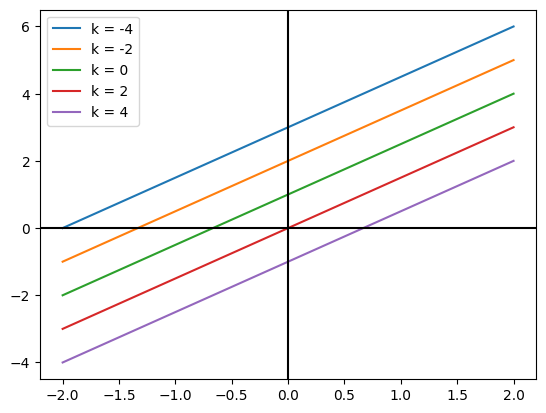

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# cria um domínio, 100 pontos entre -2 a 2
x = np.linspace(-2, 2, 100)

# para k variando de -4 a 6, com intervalos de 2 a 2
for k in range(-4, 6, 2):
  r = lambda x: (3*x + 2 - k)/2 # equação da reta que cria as curvas de nível
  plt.plot(x, r(x), label='k = %s' % k) # plota as retas no gráfico

plt.axvline(color='black')
plt.axhline(color='black')
plt.legend()
plt.show()

Podemos usar a biblioteca gráfica `matplotlib` para plotar curvas de nível de maneira mais direta, utilizando a própria função de duas variáveis e o comando `plt.contour`.

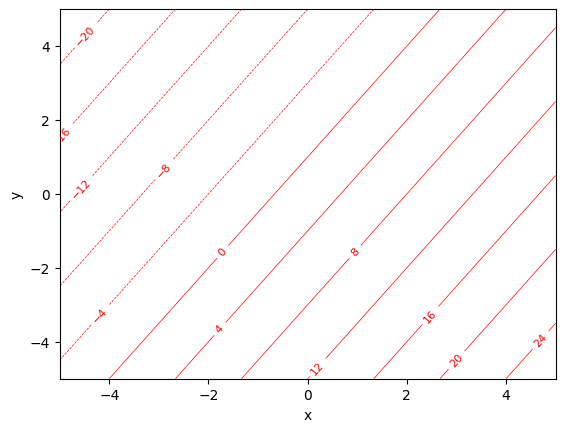

In [ ]:
# inicializando uma nova figura
fig = plt.figure()

# cria-se dominios para cada uma das variaveis // eixos
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

# determina coordenadas x e y, //intersepto de x e y
xx, yy = np.meshgrid(x, y)

# define a z em função de x e y
f = lambda x, y: 3*x - 2*y + 2

# define pontos z como "saidas" da funcao acima
zz = f(xx, yy)

ax = fig.add_subplot()
#
c = plt.contour(xx, yy, zz, 15, linewidths=0.5, colors='red')
# plota as curvas de nivel dada as coordenadas
plt.clabel(c, inline=2, fontsize=8)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Para facilitar o entendimento da figura acima, podemos plotar também um **mapa de cores**, indicando a "altura" de cada curva pela sua cor.

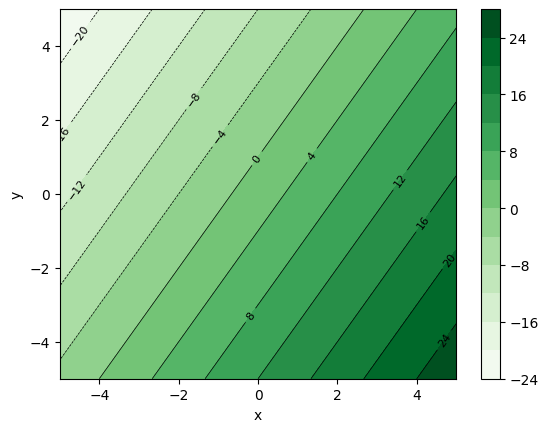

In [ ]:
# cria dominio, definindo as dimensões de x e y
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

# a função meshgrid transforma o domínio especificado por dois vetores x y em duas matrizes xx e yy.
xx, yy = np.meshgrid(x, y)

# definindo a função f
f = lambda x, y: 3*x - 2*y + 2

# plotando o mapa de cores
ax = fig.add_subplot()
plt.contourf(xx, yy, f(xx,yy), 15, cmap=plt.cm.Greens)
plt.colorbar()

# plotando as curvas de nível
ax = fig.add_subplot()
c = plt.contour(xx, yy, f(xx, yy), 15, linewidths=0.5, colors='black')
# determinando o intervalo entre os valores de x e y que aparecem no gráfico, fontsize determina o tamanho dos números
plt.clabel(c, inline=2, fontsize=8)

plt.xlabel('x')
plt.ylabel('y')
plt.show()

> **Ou seja, à medida que $x$ <u>cresce</u> e $y$ <u>decresce</u>, a coordenada $z$ cresce (os pontos do gráfico "ficam mais altos").**

<br>

Uma maneira de interpretar tridimensionalmente o gráfico acima é imaginar que as retas estão posicionadas a uma "altura" $k$. Podemos plotar exatamente isso utilizando os comandos abaixo.

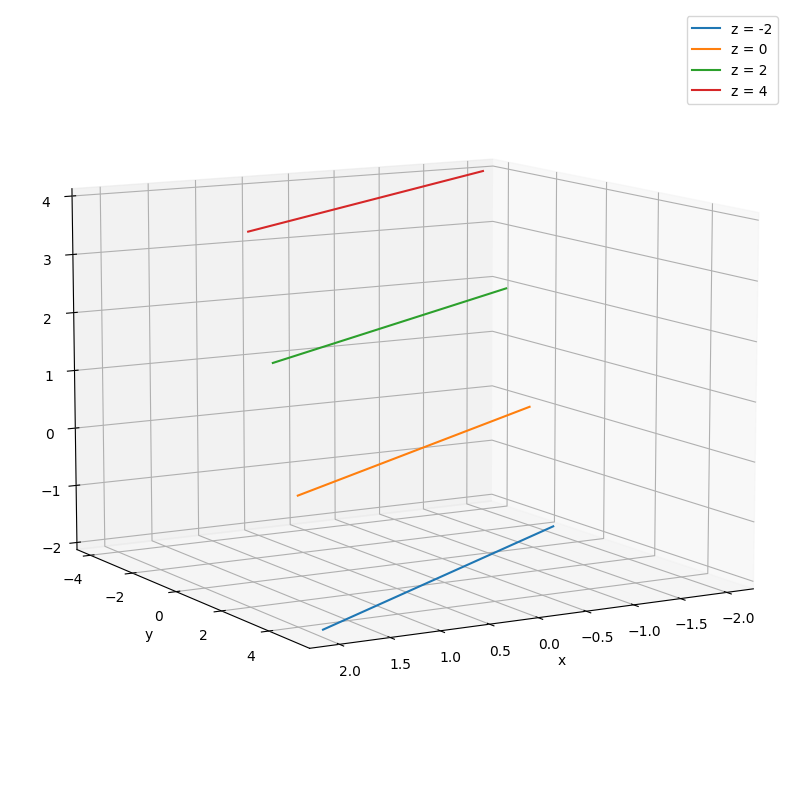

In [ ]:
# inicialiando uma nova figura
fig = plt.figure(figsize=(10, 20))
# plotando eixos tridimensionais
ax = plt.axes(projection='3d')

x = np.linspace(-2, 2, 100)

# define k para -2, 0, 2, 4
for k in [-2, 0, 2, 4]:
  # cria uma função dentro do for, inserindo cada valor de z (ou k) que queremos plotar
  y = (3 * x + (2 - k)) / 2
  # cria uma matriz em que todas as linhas e colunas sao 1 e multiplica por k
  z = k * np.ones(np.shape(x))
  # plota o gráfico tridimensional
  ax.plot3D(x, y, z, label='z = %s' % k)

# define o ângulo do gráfico
ax.view_init(10, 60)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

> **As curvas de nível acima servem para guiar nossa intuição sobre a aparência do gráfico de $f$.**

<br>

Podemos confirmar essa intuição plotando finalmente a superfície e suas projeções com o código abaixo.

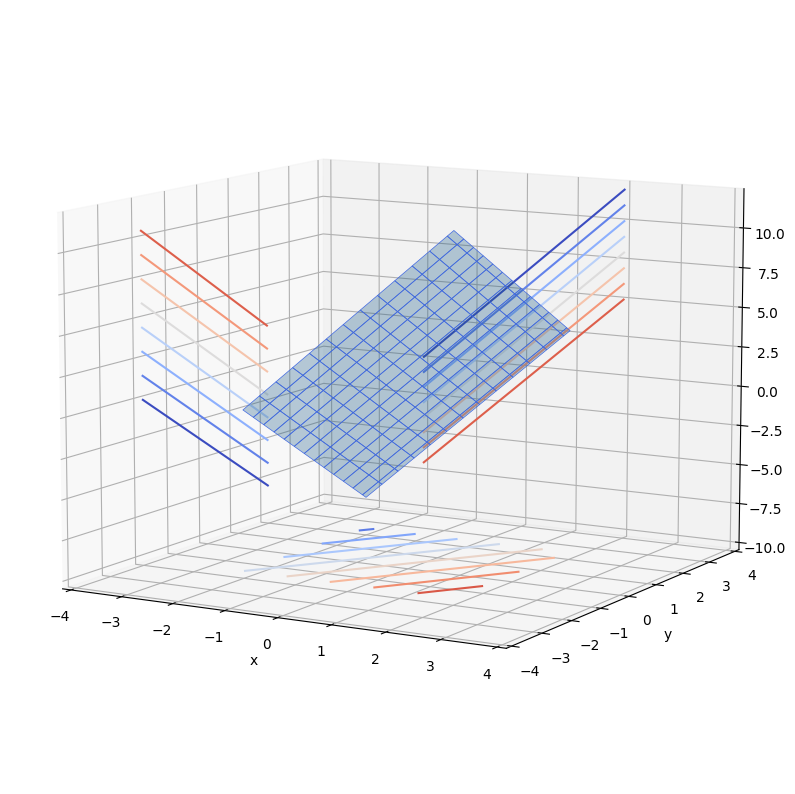

In [ ]:
from mpl_toolkits.mplot3d import axes3d

ax = plt.figure(figsize=(10, 20)).add_subplot(projection='3d')

x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
xx, yy = np.meshgrid(x, y)

f = lambda x, y: 3*x - 2*y + 2

zz = f(xx, yy)

# plotando a superfície 3D
ax.plot_surface(xx, yy, zz, edgecolor='royalblue', lw=0.5, rstride=8, cstride=8,
                alpha=0.3)

# plotando as projeções da superfície em cada direção - os valores de offset
# coincidir com os limites dados para cada eixo para que as projeções apareçam
# nas "paredes"
ax.contour(xx, yy, zz, zdir='z', offset=-10, cmap='coolwarm')
ax.contour(xx, yy, zz, zdir='x', offset=-4, cmap='coolwarm')
ax.contour(xx, yy, zz, zdir='y', offset=4, cmap='coolwarm')
# limites de cada eixo
ax.set(xlim=(-4, 4), ylim=(-4, 4), zlim=(-10, 12),
       xlabel='x', ylabel='y', label='y')

ax.view_init(10, -60)
plt.show()

<br><br>

***

<br>

## **Exemplo 2: $g(x, y) = x^2 + y^2 + 5$**
<br>

Vamos começar estudando a função acima pelas suas curvas de nível. Fazendo $g(x, y) = k$, onde $k$ é uma constante fixada, temos

$$\quad \quad\ x^2 + y^2 + 5 = k$$

$$\implies x^2 + y^2 = k - 5,$$

que é a **equação de um círculo** de raio $\sqrt{k-5}$. Logo, sempre que $k-5 < 0$, não haverá nenhum ponto satisfazendo essa equação.

Vamos plotar as curvas de nível para diferentes valores de $k$.

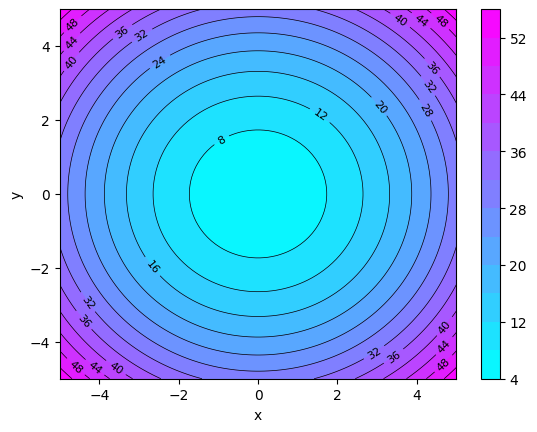

In [ ]:
# cria o domínio com x e y como 100 pontos entre -5 e 5
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

# a função meshgrid transforma o domínio especificado por dois vetores x y em duas matrizes xx e yy.
xx, yy = np.meshgrid(x, y)

# define a função g em função de x e y
g = lambda x, y: x**2 + y**2 + 5

# substitui os valores encontrados pelo meshgrid para dentro da função f(x,y), descobrindo o valor z (ou k) de cada um dos pontos (x,y)
zz = g(xx, yy)

# plotando mapa de cores
ax = fig.add_subplot()
plt.contourf(xx, yy, g(xx,yy), 15, cmap=plt.cm.cool)
plt.colorbar()

ax = fig.add_subplot()
# plota curvas de nível
c = plt.contour(xx, yy, g(xx, yy), 15, linewidths=0.5, colors='black')
# plota curvas de nível
plt.clabel(c, inline=2, fontsize=8)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

> **Vemos que as curvas de nível são todas círculos, cujo raio cresce cada vez mais devagar à medida que a altura aumenta.**

<br>

Vamos plotar essas curvas tridimensionalmente. Para definir $y$ em função de $x$ através da equação

$$x^2+y^2=k-5,$$

precisamos definir duas funções

$$y_1 = \sqrt{k-5-x^2},$$
$$y_2 = -\sqrt{k-5-x^2}.$$

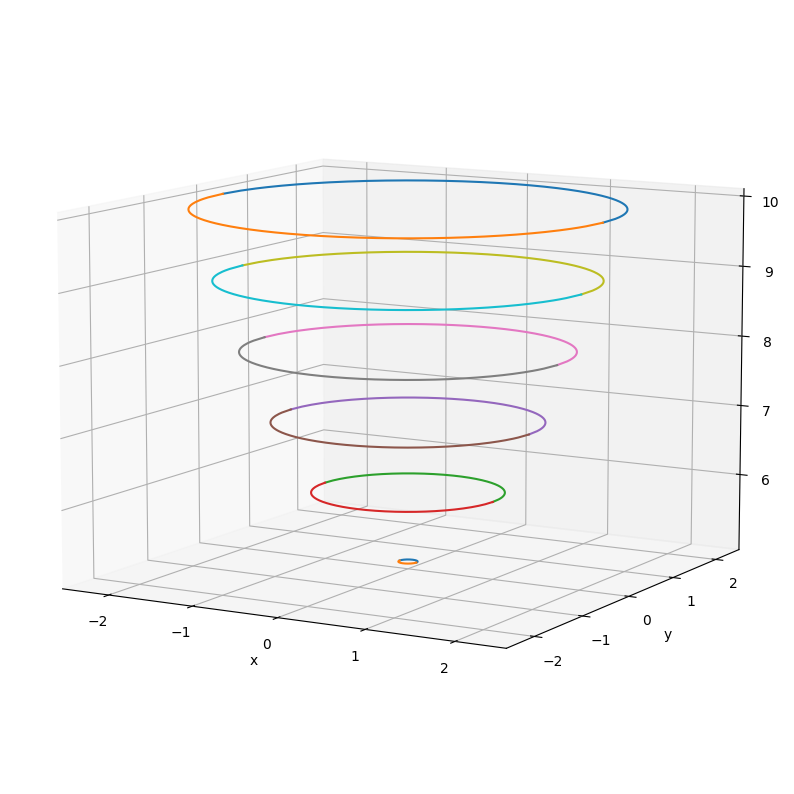

In [ ]:
# inicialiando uma nova figura
fig = plt.figure(figsize=(10, 20))
# plotando eixos tridimensionais
ax = plt.axes(projection='3d')

# define k para 5.01, 6, 7, 8, 9, 10
for k in [5.01, 6, 7, 8, 9, 10]:
  # abs - valor absoluto, já que a função dava alguns valores negativos dentro da raiz
  x = np.linspace(-np.sqrt(k - 5), np.sqrt(k - 5), 200)
  y1 = np.sqrt(abs(k - 5 - x**2))
  y2 = -np.sqrt(abs(k - 5 - x**2))
  # cria uma matriz em que todas as linhas e colunas sao 1 e multiplica por k
  z = k * np.ones(np.shape(x))
  # plota o gráfico tridimensional
  ax.plot3D(x, y1, z)
  ax.plot3D(x, y2, z)

# define o ângulo do gráfico
ax.view_init(10, -60)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Finalmente, plotamos a superfície e suas projeções:

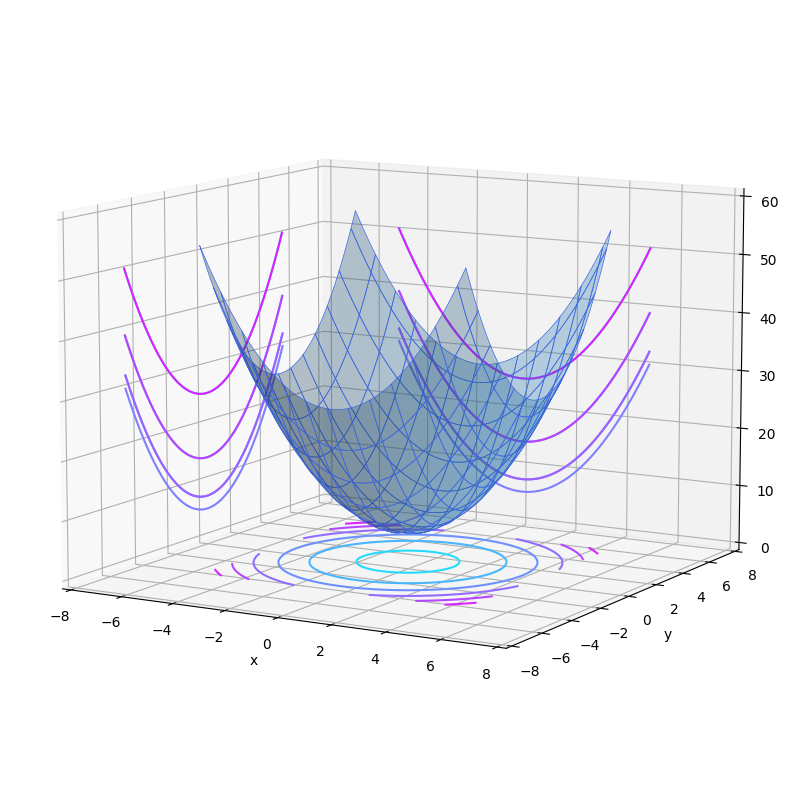

In [ ]:
ax = plt.figure(figsize=(10, 20)).add_subplot(projection='3d')

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
xx, yy = np.meshgrid(x, y)

# definindo a função f
f = lambda x, y: x**2 + y**2 + 5

# substitui os valores encontrados pelo meshgrid para dentro da função f(x,y), descobrindo o valor z (ou k) de cada um dos pontos (x,y)
zz = f(xx, yy)

# plotando a superfície
ax.plot_surface(xx, yy, zz, edgecolor='royalblue', lw=0.5, rstride=8, cstride=8,
                alpha=0.3)

# plotando as projeções da superfície em cada direção - os valores de offset
# coincidir com os limites dados para cada eixo para que as projeções apareçam
# nas "paredes"
ax.contour(xx, yy, zz, zdir='z', offset=0, cmap='cool')
ax.contour(xx, yy, zz, zdir='x', offset=-8, cmap='cool')
ax.contour(xx, yy, zz, zdir='y', offset=8, cmap='cool')
# limites de cada eixo
ax.set(xlim=(-8, 8), ylim=(-8, 8), zlim=(0, 60),
       xlabel='x', ylabel='y', zlabel='y')

ax.view_init(10, -60)
plt.show()

Note que **não apenas as interseções com planos horizontais** $z=$ constante são úteis: ao intersectar o gráfico de $f$ com planos do tipo $y=$ constante e $x=$ constante, encontramos **parábolas**, que também ajudam a descrever a superfície

Ou seja, se $y=3$, temos

$$\quad \quad \quad \quad \quad \ z = x^2 + 3^2 - 5$$
$$\implies \quad z = x^2 + 4,$$

que é a equação de uma parábola que deve ser posicionada no plano $y=3$.

<br><br>

***

<br>



## **Exemplo 3:**
<br>

Neste exemplo vamos visualizar uma matriz que contém dados em uma grade regular bidimensional de 16x16. Podemos interpretar esses dados como a temperatura de uma chapa metálica aquecida por duas fontes de calor.

Nesse caso, o valor da temperatura depende da coordenada $(x,y)$. Vamos plotar esses dados através de curvas de nível.

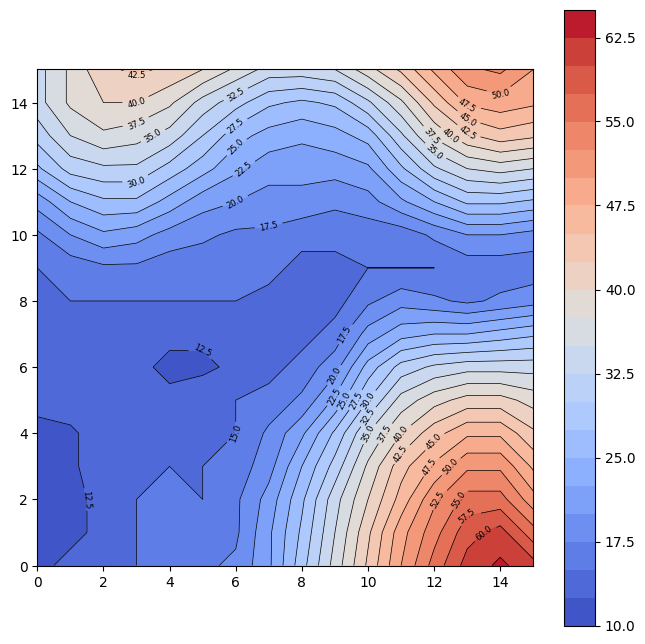

In [ ]:
T = np.array([
[12,13,14,15,16,17,18,22,29,36,43,50,56,61,63,61],
[12,12,13,15,16,16,17,22,28,35,42,49,54,59,61,56],
[11,12,13,15,16,15,17,21,27,34,40,46,52,56,56,51],
[11,12,14,15,15,15,16,19,25,31,38,44,48,52,52,47],
[12,12,14,15,14,14,15,18,22,28,35,40,44,47,47,43],
[13,14,15,13,13,14,15,16,18,23,30,36,39,41,41,39],
[14,15,14,13,12,12,13,14,16,19,26,31,33,34,34,34],
[14,15,14,14,13,13,13,13,14,16,21,24,25,25,26,27],
[15,15,15,15,15,15,15,14,13,14,17,19,18,17,18,19],
[15,16,17,17,16,16,16,16,14,14,15,15,15,16,16,16],
[17,20,22,21,19,18,17,17,16,16,16,16,18,20,20,19],
[21,25,27,27,24,21,20,19,19,18,19,22,25,28,28,27],
[27,31,32,32,29,26,23,21,21,21,22,27,32,35,36,35],
[31,35,37,36,34,30,26,24,23,24,26,32,38,42,44,43],
[34,38,40,40,38,34,31,28,27,28,32,37,43,48,49,48],
[34,38,42,43,42,40,37,34,34,35,39,43,48,52,53,50]],
dtype = float)

x = np.linspace(0, 15, 16)
y = np.linspace(0, 15, 16)
xi, yi = np.meshgrid(x, y)

fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot()
ax.set(aspect='equal')
plt.contourf(x, y, T, 20, cmap=plt.cm.coolwarm)
plt.colorbar()
c = plt.contour(x, y, T, 20, linewidths=0.5, colors='k')
plt.clabel(c, inline=2, fontsize=6)
plt.show()

<br><br>

***
***

<br>

## Exercício 1:
<br>

Estude o gráfico da função

$$z=j(x,y)=x^4 + y^4 -4y + 4,$$

para $x\in[-6, 6]$ e $y\in[-6, 6]$, conforme os passos abaixo.

<br>

(a) Determine a equação das curvas bidimensionais $x = f(y)$ obtidas da interseção do gráfico de $h$ com planos do tipo $z=k$:

$$
x = \sqrt[4]{k-y⁴+4y-4}.
$$

<ipython-input-35-f2bb1b8e149c>:6: RuntimeWarning: invalid value encountered in power
  x = lambda y: np.power(-y**4 +4*y - 4 + k, 1/4)
<ipython-input-35-f2bb1b8e149c>:7: RuntimeWarning: invalid value encountered in power
  mx = lambda y: -np.power(-y**4 +4*y - 4 + k, 1/4)


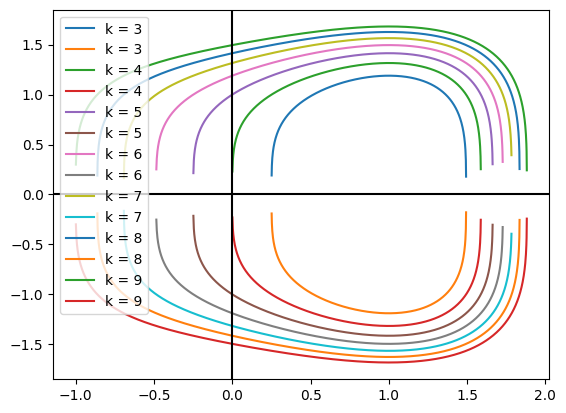

In [ ]:
# determinando o domínio, definindo 10000 valores para y entre -7 e 7
y = np.linspace(-7, 7, 10000)

# para k variando de 3 a 10
for k in range(3, 10, 1):
  x = lambda y: np.power(-y**4 +4*y - 4 + k, 1/4)
  mx = lambda y: -np.power(-y**4 +4*y - 4 + k, 1/4)
  plt.plot(y, x(y), label='k = %s' % k) # plota as curvas de niveis
  plt.plot(y, mx(y), label='k = %s' % k)

plt.axvline(color='black')
plt.axhline(color='black')
plt.legend()
plt.show()


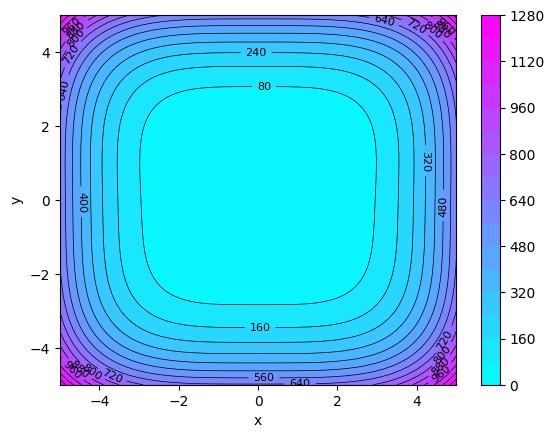

In [ ]:
# cria o domínio com x e y como 100 pontos entre -5 e 5
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

# definindo uma função que determina todos os pontos de x e y dentre os valores aderidos no linspace
xx, yy = np.meshgrid(x, y)

# define a função g em função de x e y
g = lambda x, y: x**4 + y**4 - 4*y + 4

# substituindo os valores de x e y para dentro da função g(x,y), achando o valor z de cada ponto (x,y)
zz = g(xx, yy)

# plotando mapa de cores
ax = fig.add_subplot()
plt.contourf(xx, yy, g(xx,yy), 15, cmap=plt.cm.cool)
plt.colorbar()

ax = fig.add_subplot()
# plota curvas de nível
c = plt.contour(xx, yy, g(xx, yy), 15, linewidths=0.5, colors='black')
# plota curvas de nível
plt.clabel(c, inline=2, fontsize=8)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

<br>

b) Plote as curvas de nível acima **no espaço tridimensional**, para valores bem escolhidos de $k$.

<ipython-input-39-dac9a6847026>:10: RuntimeWarning: invalid value encountered in power
  r = np.power(-y**4 +4*y - 4 + k, 1/4)
<ipython-input-39-dac9a6847026>:11: RuntimeWarning: invalid value encountered in power
  r1 = -np.power(-y**4 +4*y - 4 + k, 1/4)


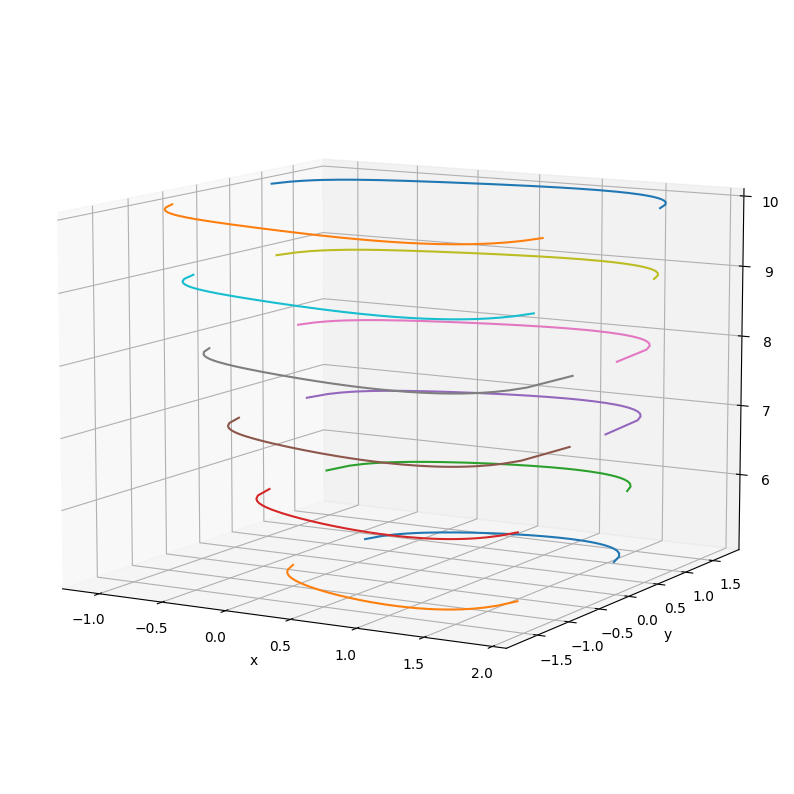

In [ ]:
# inicialiando uma nova figura
fig = plt.figure(figsize=(10, 20))
# plotando eixos tridimensionais
ax = plt.axes(projection='3d')

# define k para  5.01, 6, 7, 8, 9, 10
for k in [5.01, 6, 7, 8, 9, 10]:
  # define o domínio, 200 pontos de y entre -5 e 5
  y = np.linspace(-5, 5, 200)
  r = np.power(-y**4 +4*y - 4 + k, 1/4)
  r1 = -np.power(-y**4 +4*y - 4 + k, 1/4)
  # cria uma matriz em que todas as linhas e colunas sao 1 e multiplica por k
  z = k * np.ones(np.shape(y))
  # plota o gráfico tridimensional
  ax.plot3D(y, r, z)
  ax.plot3D(y, r1, z)

# define o ângulo do gráfico
ax.view_init(10, -60)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

<br>

c) Plote o gráfico tridimensional de $j(x, y)$, juntamente com as suas projeções nos planos coordenados.

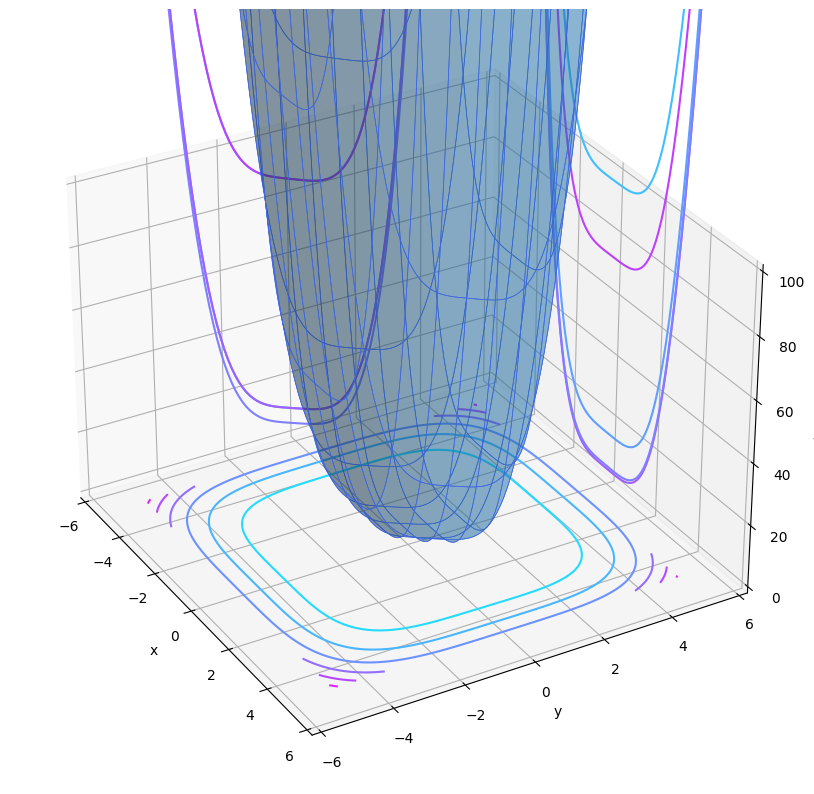

In [ ]:
ax = plt.figure(figsize=(10, 20)).add_subplot(projection='3d')

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
xx, yy = np.meshgrid(x, y)

# definindo a função f
g = lambda x, y: x**4 + y**4 - 4*y + 4

# substitui os valores encontrados pelo meshgrid para dentro da função f(x,y), descobrindo o valor z (ou k) de cada um dos pontos (x,y)
zz = g(xx, yy)

# plotando a superfície
ax.plot_surface(xx, yy, zz, edgecolor='royalblue', lw=0.5, rstride=8, cstride=8,
                alpha=0.3)

# plotando as projeções da superfície em cada direção do gráfico junto com seus contornos 2d
ax.contour(xx, yy, zz, zdir='z', offset=0, cmap='cool')
ax.contour(xx, yy, zz, zdir='x', offset=-6, cmap='cool')
ax.contour(xx, yy, zz, zdir='y', offset=6, cmap='cool')

# limites de cada eixo
ax.set(xlim=(-6, 6), ylim=(-6, 6), zlim=(0, 100),
       xlabel='x', ylabel='y', zlabel='y')

# definindo o ângulo do gráfico
ax.view_init(30, -30)
plt.show()


<br><br>

***
***

<br>

## Exercício 2:
<br>

Estude o gráfico da função

$$z=h(x,y)=x^2-2y^2,$$

para $x\in[-5, 5]$ e $y\in[-5, 5]$, conforme os passos abaixo.

<br>

(a) Determine a equação das curvas bidimensionais $z = f(y)$ obtidas da interseção do gráfico de $h$ com planos do tipo $x=k$:

$$
z = -2y^2 + k^2.
$$

<br>

(b) Plote as curvas acima em um sistema de coordenadas tridimensional, para alguns valores de $k$.

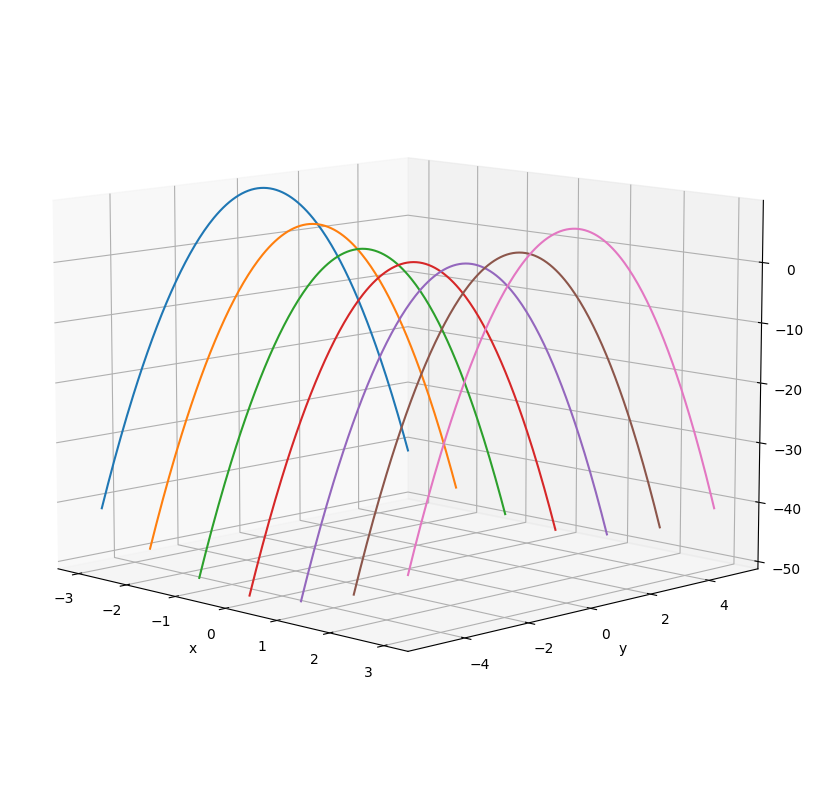

In [ ]:
# inicialiando uma nova figura
fig = plt.figure(figsize=(10, 20))
# plotando eixos tridimensionais
ax = plt.axes(projection='3d')

# define k para -3, -2, -1, 0, 1, 2, 3
for k in [-3, -2, -1, 0, 1, 2, 3]:
  # define o domínio, 200 pontos de y entre -5 e 5
  y = np.linspace(-5, 5, 200)
  z = -2*(y**2)+(k**2)
  # cria uma matriz em que todas as linhas e colunas sao 1 e multiplica por k
  x = k * np.ones(np.shape(z))
  # plotando o gráfico tridimensional
  ax.plot3D(x, y, z)

# define o ângulo do gráfico
ax.view_init(10, -45)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

<br>

(c) Determine a equação das curvas bidimensionais $z = f(x)$ obtidas da interseção do gráfico de $h$ com planos do tipo $y=k$:

$$
z = x^2 -2k^2
$$

<br>

(d) Plote as curvas acimas em um sistema de coordenadas tridimensional, para alguns valores de $k$.

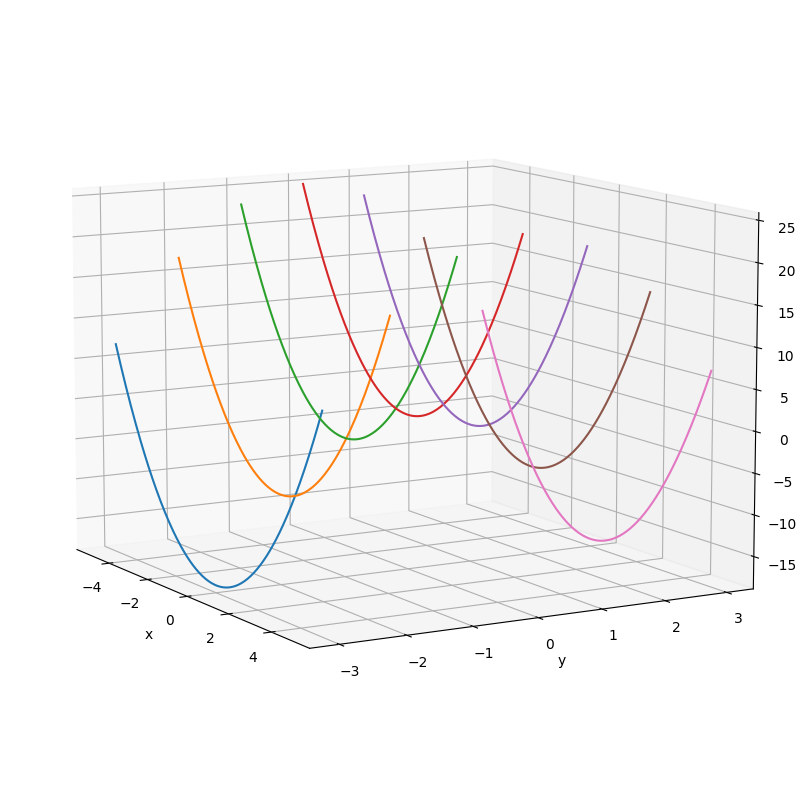

In [ ]:
# inicialiando uma nova figura
fig = plt.figure(figsize=(10, 20))
# plotando eixos tridimensionais
ax = plt.axes(projection='3d')

# define k para -3, -2, -1, 0, 1, 2, 3
for k in [-3, -2, -1, 0, 1, 2, 3]:
  # define o domínio, 200 pontos de x entre -5 e 5
  x = np.linspace(-5, 5, 200)
  z = -2*(k**2)+(x**2)
  # cria uma matriz em que todas as linhas e colunas sao 1 e multiplica por k
  y = k * np.ones(np.shape(z))
  # plotando o gráfico tridimensional
  ax.plot3D(x, y, z)

# define o ângulo do gráfico
ax.view_init(10, -30)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

<br>

(e) Plote o gráfico tridimensional da função $h$ juntamente com suas projeções.

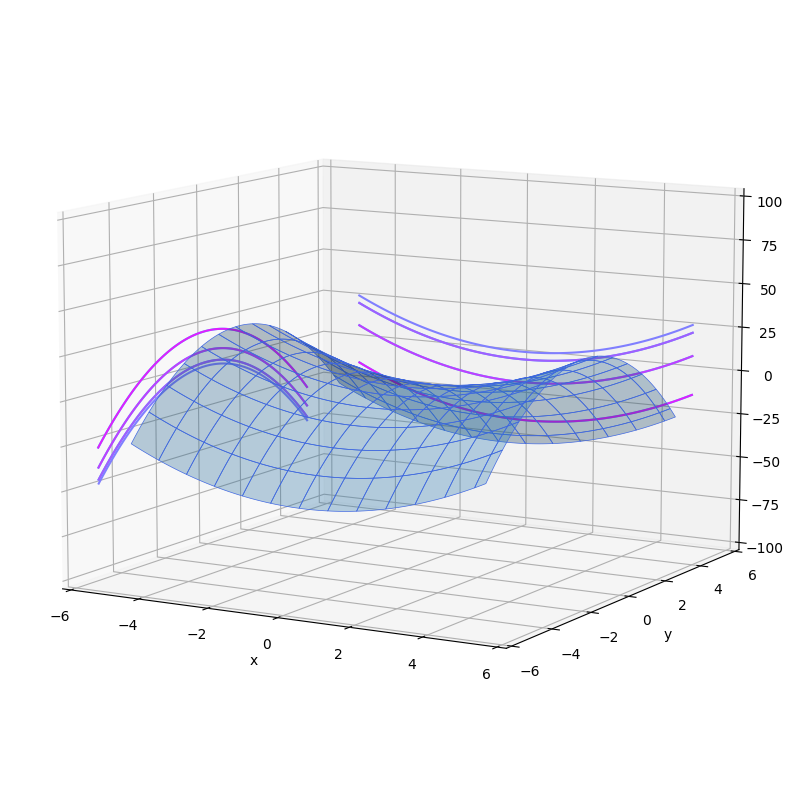

In [ ]:
ax = plt.figure(figsize=(10, 20)).add_subplot(projection='3d')

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
xx, yy = np.meshgrid(x, y)

# definindo a função f
z = lambda x, y: (x**2)-2*(y**2)

# substitui os valores encontrados pelo meshgrid para dentro da função f(x,y), descobrindo o valor z (ou k) de cada um dos pontos (x,y)
zz = z(xx, yy)

# plotando a superfície
ax.plot_surface(xx, yy, zz, edgecolor='royalblue', lw=0.5, rstride=8, cstride=8,
                alpha=0.3)

# plotando as projeções da superfície em cada direção do gráfico junto com seus contornos 2d
ax.contour(xx, yy, zz, zdir='x', offset=-6, cmap='cool')
ax.contour(xx, yy, zz, zdir='y', offset=6, cmap='cool')

# limites de cada eixo
ax.set(xlim=(-6, 6), ylim=(-6, 6), zlim=(-100, 100),
       xlabel='x', ylabel='y', zlabel='y')

# definindo o ângulo do gráfico
ax.view_init(10, -60)
plt.show()

<br><br>

***

## Exercício 3:
<br>

Considere a função

$$
z = l(x, y) = x^2 + 5\sin(y),
$$

na região $x\in[-5, 5]$ e $y\in[-5, 5]$.

<br>

(a) Plote no plano tridimensional as curvas bidimensionais $z=f(y)$ dadas pela interseção do gráfico de $l$ com planos do tipo $x=k$, para diferentes valores de $k$.

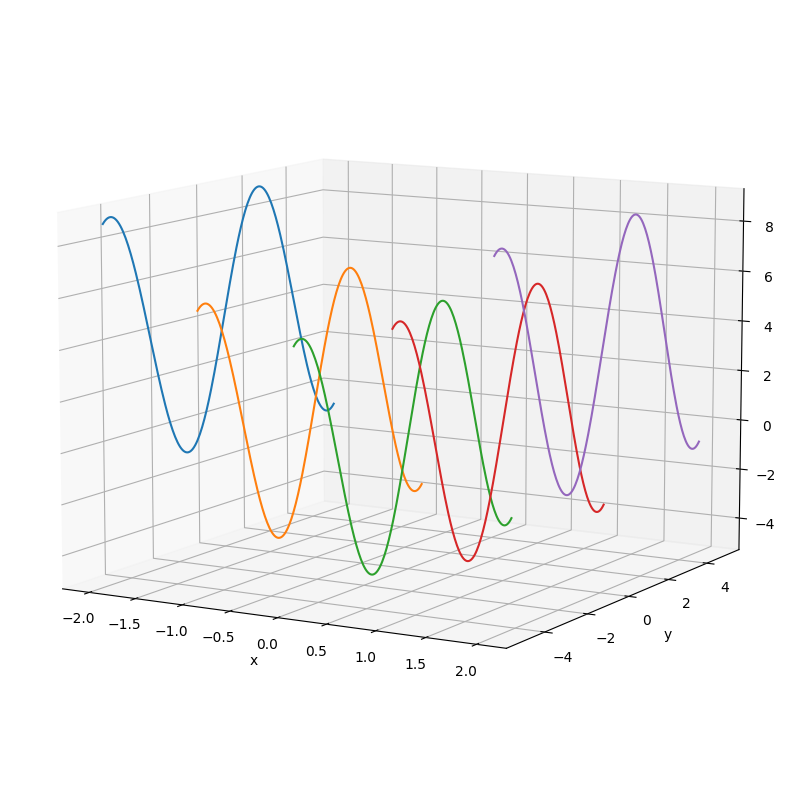

In [ ]:
# inicialiando uma nova figura
fig = plt.figure(figsize=(10, 20))
# plotando eixos tridimensionais
ax = plt.axes(projection='3d')

# define k para -2, -1, 0, 1, 2
for k in [-2, -1, 0, 1, 2]:
  # define o domínio, 200 pontos de x entre -5 e 5
  y = np.linspace(-5, 5, 200)
  z = 5* np.sin(y)+ (k**2)
  # cria uma matriz em que todas as linhas e colunas sao 1 e multiplica por k
  x = k * np.ones(np.shape(z))
  # plotando o gráfico tridimensional
  ax.plot3D(x, y, z)

# define o ângulo do gráfico
ax.view_init(10, -60)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

<br>

(b) Plote no plano tridimensional as curvas bidimensionais $z=f(x)$ dadas pela interseção do gráfico de $l$ com planos do tipo $y=k$, para diferentes valores de $k$.

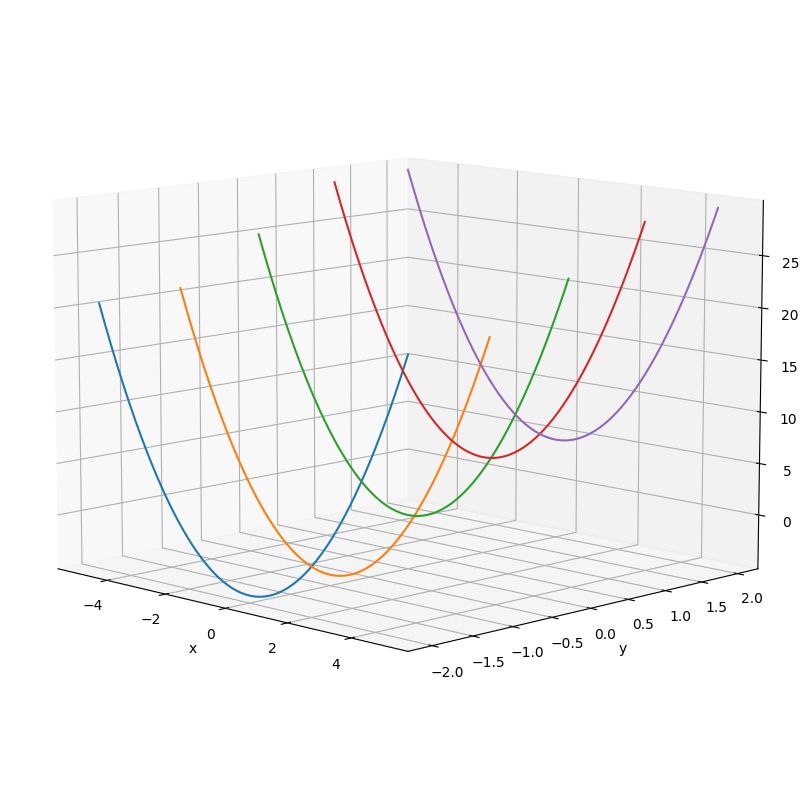

In [ ]:
# inicialiando uma nova figura
fig = plt.figure(figsize=(10, 20))
# plotando eixos tridimensionais
ax = plt.axes(projection='3d')

# define k para -2, -1, 0, 1, 2
for k in [-2, -1, 0, 1, 2]:
  # define o domínio, 200 pontos de x entre -5 e 5
  x = np.linspace(-5, 5, 200)
  z = 5* np.sin(k)+ (x**2)
  # cria uma matriz em que todas as linhas e colunas sao 1 e multiplica por k
  y = k * np.ones(np.shape(z))
  # plotando o gráfico tridimensional
  ax.plot3D(x, y, z)

# define o ângulo do gráfico
ax.view_init(10, -45)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

<br>

(c) Plote o gráfico tridimensional de $l$ com as suas projeções.

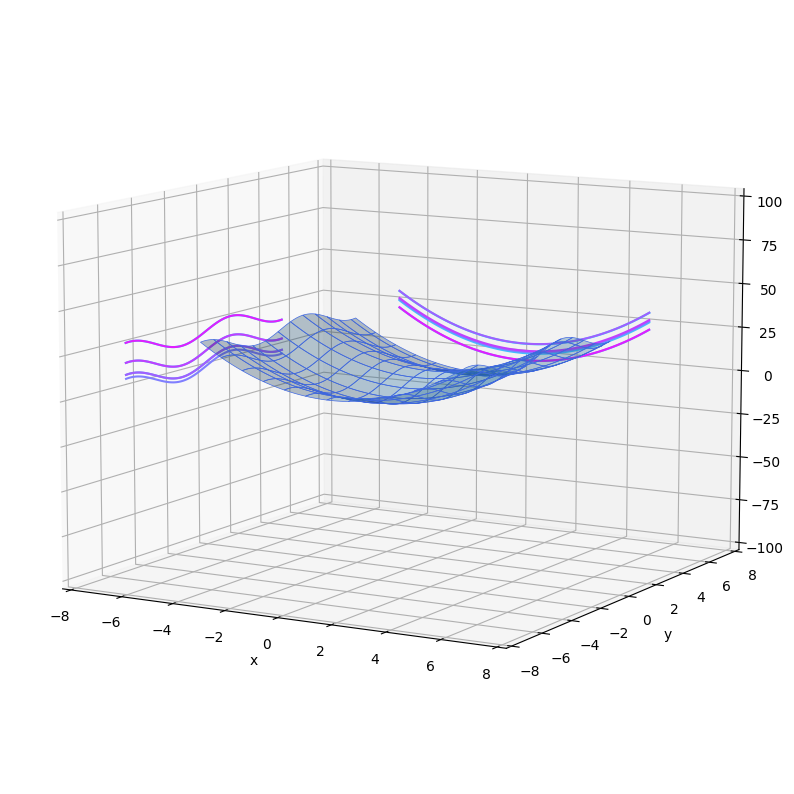

In [ ]:
ax = plt.figure(figsize=(10, 20)).add_subplot(projection='3d')

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
xx, yy = np.meshgrid(x, y)

# definindo a função f
z = lambda x, y: 5* np.sin(y)+ (x**2)

# substitui os valores encontrados pelo meshgrid para dentro da função f(x,y), descobrindo o valor z (ou k) de cada um dos pontos (x,y)
zz = z(xx, yy)

# plotando a superfície
ax.plot_surface(xx, yy, zz, edgecolor='royalblue', lw=0.5, rstride=8, cstride=8,
                alpha=0.3)

# plotando as projeções da superfície em cada direção do gráfico junto com seus contornos 2d
ax.contour(xx, yy, zz, zdir='x', offset=-8, cmap='cool')
ax.contour(xx, yy, zz, zdir='y', offset=8, cmap='cool')

# limites de cada eixo
ax.set(xlim=(-8, 8), ylim=(-8, 8), zlim=(-100, 100),
       xlabel='x', ylabel='y', zlabel='y')

# definindo o ângulo do gráfico
ax.view_init(10, -60)
plt.show()
